<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2

### <center> Автор материала: Липко Иван Юрьевич (slack @ivanlipko)

## <center> Индивидуальный проект по анализу данных </center>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import json
import seaborn as sns

###  Часть 1. Описание набора данных и признаков

**1. Описание набора данных и признаков (2 балла)**
    (+) Описан процесс сбора данных (если применимо), есть подробное описание решаемой задачи, в чем ее ценность, дано описание целевого и прочих признаков;
    (+/-) Сказано, какая задача решается, откуда данные, что есть целевой признак. Даны названия признаков;
    (-/+) Сказано, какая задача решается, откуда данные и что есть целевой признак;
    (-) Описание отсутствует и дано только название датасета или решаемой задачи, скажем, "прогноз оттока".


Данные представляют собой **базу кинофильмов и оценок пользователей** из The Movie Database (TMDb). Данные взяты из Kaggle (https://www.kaggle.com/tmdb/tmdb-movie-metadata).

Из описания известно что **данные были введены пользователями вручную**, соответственно могут быть ошибки или не соответствия с официальными источниками (All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like). **Метаданные были скачаны** с использованием парсера используя API TMDb's  (https://gist.github.com/SohierDane/4a84cb96d220fc4791f52562be37968b). Как считается рейтинг (целевая переменная), нашёл вот что: 
` Популярной возможностью IMDb являются онлайн-голосования. Любой зарегистрированный посетитель сайта может голосовать за фильмы, выставляя им рейтинг: от 1 («ужасный фильм» ) до 10 («шедевр» ) баллов `

Я **решаю задачу предсказания рейтинга фильма** (признак vote_average). **Ценность** заключается в следующем: можно выяснить, как зависит окупаемость фильма, его популярность, делать подбор актёров таким образом, чтобы рейтинг фильма. Хочу понять, возможно ли предсказать рейтинг фильма, зная только его краткое описание, бюджет и другие общедоступные данные.

Описание признаков:

 - budget -- бюджет фильма (доллары)
 - genres -- жанр фильма
 - homepage -- сайт фильма
 - id -- номер фильма в каталоге
 - keywords -- ключевые слова
 - original_language -- оригинальный язык фильма
 - original_title -- оригинальное название
 - overview -- краткая аннотация-описание
 - popularity -- популярность
 - production_companies -- студия производства
 - production_countries -- страна-производитель
 - release_date  -- дата производства (год - месяц - день)
 - revenue -- доход, кассовый сбор (доллары)
 - runtime -- продолжительность в минутах
 - spoken_languages -- языки фильма
 - status -- статус, вышел фильм или нет
 - tagline -- Слоган
 - title -- финальное название фильма
 - vote_average **(целевой признак)** -- средний рейтинг фильма
 - vote_count -- количество голосов
 

In [2]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

movies = load_tmdb_movies("tmdb_5000_movies.csv")
credits = load_tmdb_credits("tmdb_5000_credits.csv")

###  Часть 2. Первичный анализ признаков

Посмотрим что у нас из себя представляют данные.

In [3]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466


**Заключение:** Большинство признаков представляют собой json-контейнеры, которые ещё надо разворачивать и делать из них фичи.

In [4]:
print(movies.shape)
print(movies.info())

(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              480

**Заключение:** Практически все важные поля имеют значения - это хорошо

In [5]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
p = movies.original_language.value_counts()
print(p.get_values())
print(movies.original_language.unique())

[4505   70   32   27   27   19   16   14   12   11   11    9    7    5    4
    4    3    3    2    2    2    2    2    1    1    1    1    1    1    1
    1    1    1    1    1    1    1]
['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta' 'sv'
 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar' 'vi' 'ky'
 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


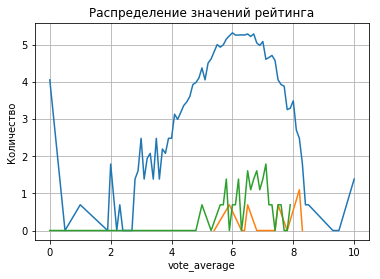

In [7]:
# распределение голосов в зависимости от языка
val_en_counts = movies[movies['original_language'] == 'en']['vote_average'].value_counts().sort_index()
val_ja_counts = movies[movies['original_language'] == 'ja']['vote_average'].value_counts().sort_index()
val_fr_counts = movies[movies['original_language'] == 'fr']['vote_average'].value_counts().sort_index()

plt.title('Распределение значений рейтинга')
plt.xlabel('vote_average'), plt.ylabel('Количество')
plt.plot(val_en_counts.keys(),np.log(val_en_counts.values))
plt.plot(val_ja_counts.keys(),np.log(val_ja_counts.values))
plt.plot(val_fr_counts.keys(),np.log(val_fr_counts.values))
plt.grid(True)
plt.show()

**Заключение**. Очевидно, что англоязычных фильмов больше чем других, но распределение голосов похожее.

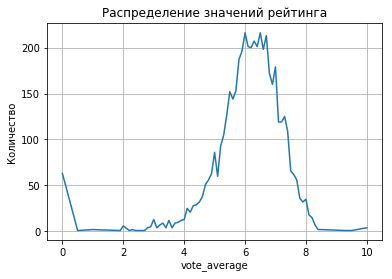

In [8]:
p = movies.vote_average.value_counts().sort_index()

plt.title('Распределение значений рейтинга')
plt.xlabel('vote_average')
plt.ylabel('Количество')
plt.plot(p.keys(),p.values)
plt.grid(True)
plt.show()

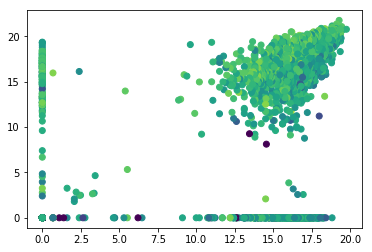

In [9]:
plt.scatter(x=np.log(movies.budget+1), y=np.log(movies.revenue+1), c=movies.vote_average)

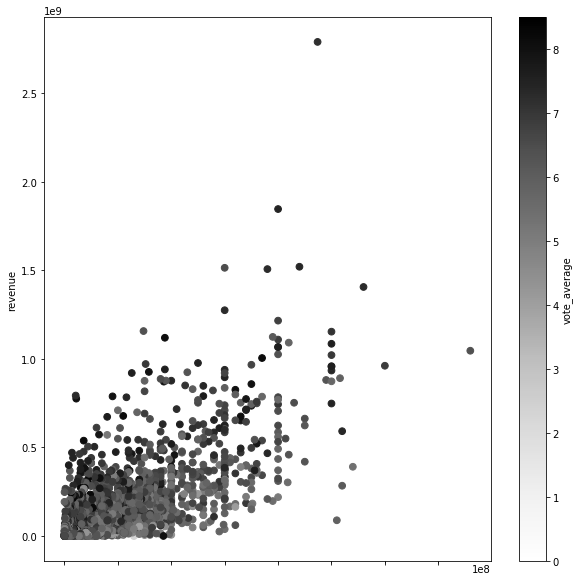

In [10]:
# plt.scatter(x=np.log(movies.budget), y=np.log(movies.revenue), c=movies.vote_average)
movies[ (movies['budget']>0) & (movies['revenue']>0) ].plot.scatter(x='budget', y='revenue', c='vote_average', figsize=(10, 10), s=45)

In [11]:
movies[ movies['budget'] <=0].head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,10588,"[{'id': 977, 'name': 'cat'}, {'id': 1155, 'nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{'name': 'Imagine Entertainment', 'id': 23}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-11-21,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
321,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,77953,"[{'id': 6078, 'name': 'politics'}, {'id': 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{'name': 'Everyman Pictures', 'id': 2242}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-08-09,104907746,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May The Best Loser Win.,The Campaign,5.6,578
359,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{'id': 10986, 'name': 'chipmunk'}, {'id': 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-17,233755553,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428


In [12]:
movies[ movies['revenue'] <=0 ].head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{'name': 'Corsan', 'id': 7299}, {'name': 'Bli...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",2015-02-13,0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",http://www.thewolfmanmovie.com/,7978,"[{'id': 494, 'name': 'father son relationship'...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-02-11,0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,10588,"[{'id': 977, 'name': 'cat'}, {'id': 1155, 'nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{'name': 'Imagine Entertainment', 'id': 23}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-11-21,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366


**Заключение**. Несмотря на то, что пропусков данных нет, в самих данных есть проблемы. TMDB ничего не знает о бюджете и доходах некоторых фильмов. (например, The Lovers, The Tuxedo). Видимо такие фильмы придётся в дальнейшем просто убирать из обучающей выборки.

Для остальных фильмов наблюдается зависимость вложения и отдачи, но однозначно сказать что дорогой фильм будет очень востребован нельзя.

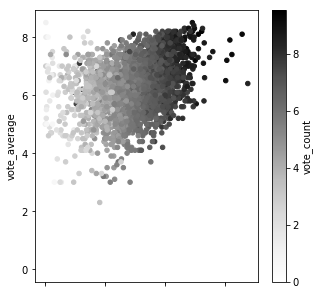

In [13]:
movs = pd.concat([movies.budget, movies.revenue, movies.popularity, movies.vote_count, movies.vote_average], axis=1)
#movs.vote_average = np.log(movs.vote_average)
movs.popularity = np.log(movs.popularity+1)
movs.vote_count = np.log(movs.vote_count+1)
movs[ (movs.budget>0) & (movs.revenue>0)].plot.scatter(x='popularity', y='vote_average', figsize=(5, 5), c='vote_count')

del movs

**Заключение**. Сказать что популярный фильм будет иметь высоки рейтинг нельзя. Есть фильмы, которые не так популярны, но имеют высокий рейтинг.

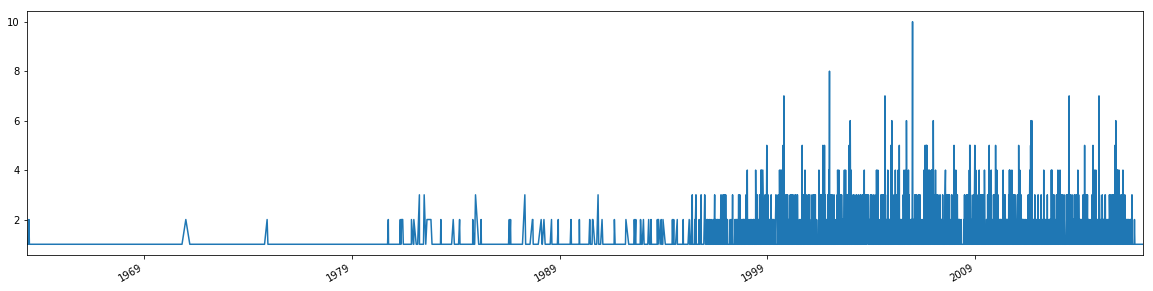

In [14]:
rel_date_time = pd.to_datetime(movies.release_date)
rel_date_time[ rel_date_time > '1963-01-01' ].value_counts().plot(figsize=(20, 5))
del rel_date_time

**Заключение**. TMDB в основном содержит фильмы 21 века.

Остальные признаки посмотрим, когда возьмём их из JSONa

###  Часть 5. Предобработка данных 

Вытяним из JSONa все жанры, языки фильмов, страну производителя и сделаем OneHotEnconding вручную (кто знает как сделать это красивее напишите мне в Слаке).

In [15]:
all_genres = []
for i in range(0,movies.shape[0]):
    all_genres.append([actor['name'] for actor in movies['genres'].iloc[i][:10]])
all_genres = set(x for l in all_genres for x in l) # множество содержит только уникальные элементы

genres = pd.DataFrame(columns=all_genres)
for i in range(0,movies.shape[0]):
    a = [actor['name'] for actor in movies['genres'].iloc[i][:10]]
    for j in all_genres:
        genres.at[i,j] = 0
    for item in a:
        genres.at[i,item] = 1

genres.fillna(0, inplace=True)
print(genres.shape)

new_cols = 'genre_'+genres.columns
genres.columns = new_cols
# print(genres.info())
# print(genres.head(5)) # для проверки
# print(genres.tail(5)) # для проверки

genres.to_csv('genres.csv')
# genres = pd.read_csv('genres.csv')
# genres = genres.drop('Unnamed: 0', axis=1)
# for col in genres.columns:
#     genres[col] = pd.to_numeric(genres[col], errors='coerce', downcast='unsigned')

(4803, 20)


In [17]:
# Компаний очень много и комп медленно их обрабатывает, поэтому пока не трогаю
# all_prod_companies = []
# for i in range(0,movies.shape[0]):
#     all_prod_companies.append([comp['id'] for comp in movies['production_companies'].iloc[i][:10]])
# all_prod_companies = set(x for l in all_prod_companies for x in l)

# prod_comps = pd.DataFrame(columns=all_prod_companies)
# for i in range(0,movies.shape[0]):
#     a = [comp['id'] for comp in movies['production_companies'].iloc[i][:10]]
#     for j in all_prod_companies:
#         prod_comps.at[i,j] = 0
#     for item in a:
#         prod_comps.at[i,item] = 1

# prod_comps.fillna(0, inplace=True)
# print(prod_comps.shape)
# print(prod_comps.head(3))

In [18]:
all_prod_countrs = []
for i in range(0,movies.shape[0]):
    all_prod_countrs.append([comp['iso_3166_1'] for comp in movies['production_countries'].iloc[i][:10]])
all_prod_countrs = set(x for l in all_prod_countrs for x in l)
print(all_prod_countrs)

prod_countrs = pd.DataFrame(columns=all_prod_countrs)
for i in range(0,movies.shape[0]):
    a = [countr['iso_3166_1'] for countr in movies['production_countries'].iloc[i][:10]]
    for j in all_prod_countrs:
        prod_countrs.at[i,j] = 0
    for item in a:
        prod_countrs.at[i,item] = 1

prod_countrs.fillna(0, inplace=True)
new_cols = 'country_'+prod_countrs.columns
prod_countrs.columns = new_cols

print(prod_countrs.shape)
# print(prod_countrs.head(3))
prod_countrs.to_csv('prod_countrs.csv')
# prod_countrs = pd.read_csv('prod_countrs.csv')
# prod_countrs = prod_countrs.drop('Unnamed: 0', axis=1)

{'US', 'RS', 'AE', 'AW', 'MT', 'MY', 'CM', 'CN', 'PA', 'BE', 'CS', 'IE', 'BG', 'BO', 'HU', 'AU', 'DZ', 'TH', 'SE', 'AO', 'LY', 'NO', 'ZA', 'KZ', 'GP', 'JP', 'FI', 'IS', 'SG', 'CH', 'PT', 'IL', 'PL', 'FR', 'MA', 'PE', 'AT', 'PH', 'HK', 'ID', 'KR', 'UA', 'CA', 'RU', 'CO', 'SK', 'AR', 'KH', 'JM', 'IT', 'IR', 'DK', 'KE', 'EG', 'IN', 'EC', 'BA', 'RO', 'NL', 'LB', 'MC', 'GB', 'NG', 'KG', 'NZ', 'LU', 'LT', 'ES', 'TN', 'CZ', 'TR', 'CY', 'PK', 'BR', 'CL', 'BS', 'MX', 'AF', 'DM', 'FJ', 'SI', 'DO', 'GR', 'BT', 'JO', 'DE', 'GY', 'TW'}
(4803, 88)


In [19]:
all_spok_langs = []
for i in range(0,movies.shape[0]):
    all_spok_langs.append([comp['iso_639_1'] for comp in movies['spoken_languages'].iloc[i][:10]])
all_spok_langs = set(x for l in all_spok_langs for x in l)
# print(all_spok_langs)

spok_langs = pd.DataFrame(columns=all_spok_langs)
for i in range(0,movies.shape[0]):
    a = [lang['iso_639_1'] for lang in movies['spoken_languages'].iloc[i][:10]]
    for j in all_spok_langs:
        spok_langs.at[i,j] = 0
    for item in a:
        spok_langs.at[i,item] = 1

spok_langs.fillna(0, inplace=True)
new_cols = 'country_'+spok_langs.columns
spok_langs.columns = new_cols

print(spok_langs.shape)
# print(spok_langs.head(3))
spok_langs.to_csv('spok_langs.csv')
# prod_countrs = pd.read_csv('prod_countrs.csv')
# prod_countrs = prod_countrs.drop('Unnamed: 0', axis=1)

(4803, 87)


LabelEncoding оригинального языка:

In [20]:
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()
movies.original_language = labelEnc.fit_transform(movies.original_language)
# print(dict(enumerate(labelEnc.classes_)))
# print(movies.original_language.head(3))      # для проверки

Из даты релиза достаём год и месяц выпуска. Вдруг окажется что например, фильмы хорошо заходят перед новыми годом, а не перед новым учебным годом.

In [21]:
temp_date_month = []
temp_date = pd.to_datetime(movies.release_date)
temp_date_data = [t.month for t in temp_date]
movies['release_month'] = temp_date_data
temp_date_data = [t.year for t in temp_date]
movies['release_year'] = temp_date_data

Соединяем теперь все столбцы в один DataFrame

In [22]:
movies = pd.concat([movies, genres, prod_countrs, spok_langs], axis=1)

Удаляем все не нужные признаки: страница фильма, ИД в каталоге, оригинальное название, статус.

In [23]:
movies.drop(['homepage', 'status', 'id', 'original_title', 'title', 'release_date'], axis=1, inplace=True)
movies.drop(['genres', 'production_countries', 'spoken_languages'], axis=1, inplace=True)

#   с чем я пока не умею работать
movies.drop(['tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

Создаём наборы данных с признаками и целевым признаком:

In [24]:
movies.columns[:50]

Index(['budget', 'original_language', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'release_month', 'release_year',
       'genre_Horror', 'genre_Crime', 'genre_Drama', 'genre_Comedy',
       'genre_Fantasy', 'genre_History', 'genre_Documentary',
       'genre_Science Fiction', 'genre_Western', 'genre_Romance', 'genre_War',
       'genre_Foreign', 'genre_Adventure', 'genre_Action', 'genre_TV Movie',
       'genre_Mystery', 'genre_Animation', 'genre_Music', 'genre_Thriller',
       'genre_Family', 'country_US', 'country_RS', 'country_AE', 'country_AW',
       'country_MT', 'country_MY', 'country_CM', 'country_CN', 'country_PA',
       'country_BE', 'country_CS', 'country_IE', 'country_BG', 'country_BO',
       'country_HU', 'country_AU', 'country_DZ', 'country_TH', 'country_SE',
       'country_AO', 'country_LY'],
      dtype='object')

In [25]:
x_data = movies.copy()
x_data.drop('vote_average', axis=1, inplace=True)
y_data = movies['vote_average']

x_data.dropna(axis=0, inplace=True)
y_data = y_data[x_data.index]

data = pd.concat([x_data, y_data], axis=1)
data.to_csv('data1.csv')

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=43)

In [27]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_data[(x_data.budget>0) & (x_data.revenue>0)], y_data[(x_data.budget>0) & (x_data.revenue>0)], test_size=0.33, random_state=43)

###  Часть 3. Первичный визуальный анализ признаков

**3. Первичный визуальный анализ данных (4 балла)**
    (+) Построены визуализации (распределения признаков, матрица корреляций и т.д.), описана связь с анализом данным (п. 2). Присутствуют выводы;
    (+/-) Построены визуализации (распределения признаков, матрица корреляций и т.д.). Присутствуют выводы с небольшими ошибками;
    (-/+) Недостает важных визуализаций и/или присутствует много ошибок в выводах;
    (-) Отсутствует.

In [28]:
# TODO Рейтинг фильмов, которые меняли своё название и не меняли.

In [29]:
movies_log = movies[(movies['budget']>0) & (movies['revenue']>0)][['vote_average', 'popularity', 'revenue', 'budget', 'vote_count','runtime']].copy()
movies_log.popularity = np.log(movies_log.popularity+1)
movies_log.revenue = np.log(movies_log.revenue+1)
movies_log.budget = np.log(movies_log.budget+1)
movies_log.vote_count = np.log(movies_log.vote_count+1)
# movies_log.vote_average = np.log(movies_log.vote_average+1)

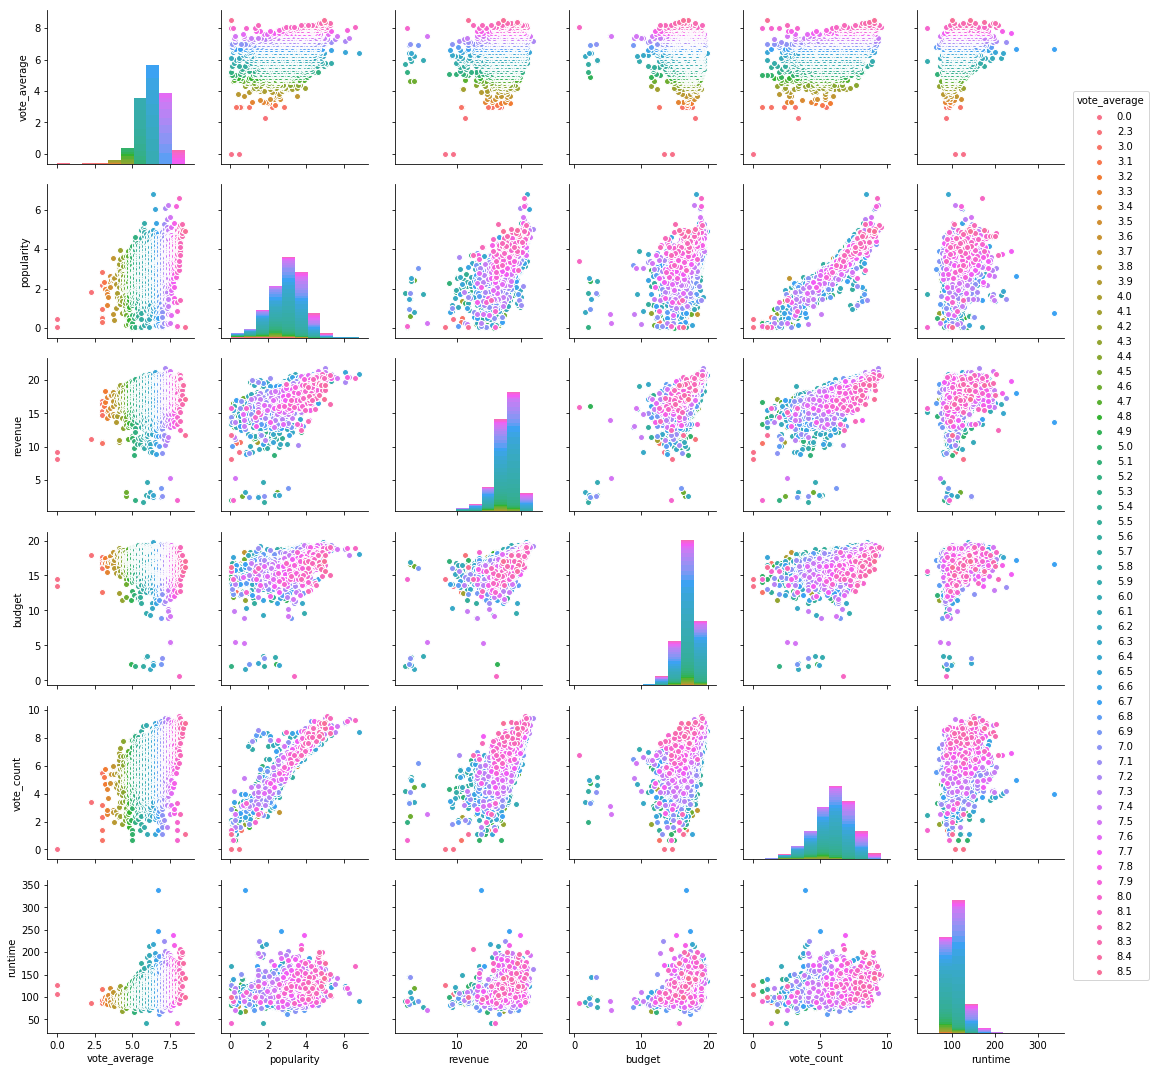

In [30]:
sns.pairplot(data=movies_log, hue='vote_average')#, vars=['vote_average', 'popularity', 'revenue', 'budget', 'vote_count'])#,'runtime'])

In [31]:
print(movies.release_month.value_counts())

9.0     588
10.0    474
12.0    456
8.0     413
6.0     389
1.0     382
3.0     372
7.0     363
5.0     363
4.0     350
2.0     326
11.0    326
Name: release_month, dtype: int64


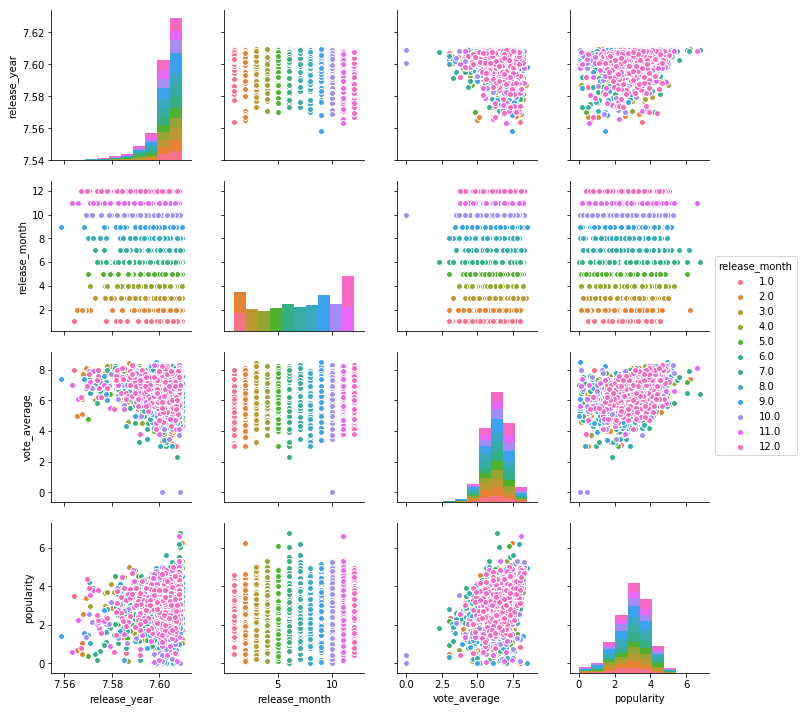

In [32]:
movies_log = movies[(movies['budget']>0) & (movies['revenue']>0)][['release_year', 'release_month', 'vote_average', 'popularity']].copy()
movies_log.release_year = np.log(movies_log.release_year+1)
movies_log.popularity = np.log(movies_log.popularity+1)
sns.pairplot(data=movies_log, hue='release_month')

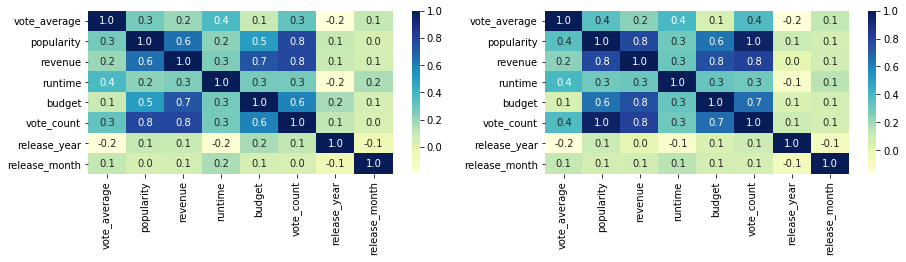

In [33]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
corr = movies[['vote_average', 'popularity', 'revenue', 'runtime', 'budget', 'vote_count', 'release_year', 'release_month']].corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True, ax=ax[0], fmt='.1f')

corr = movies[['vote_average', 'popularity', 'revenue', 'runtime', 'budget', 'vote_count', 'release_year', 'release_month']].corr(method='spearman')
sns.heatmap(corr, cmap='YlGnBu', annot=True, ax=ax[1], fmt='.1f')

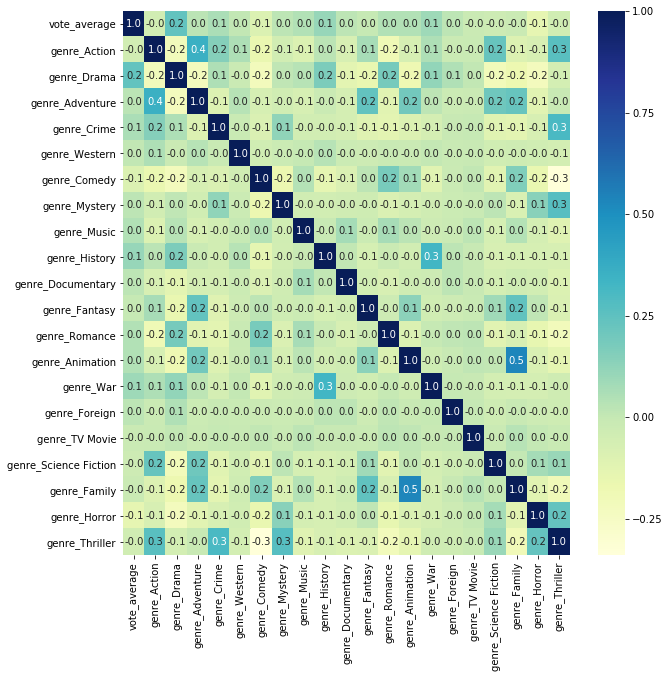

In [34]:
corr = movies[['vote_average','genre_Action', 'genre_Drama', 'genre_Adventure', 'genre_Crime',
        'genre_Western', 'genre_Comedy', 'genre_Mystery', 'genre_Music',
        'genre_History', 'genre_Documentary', 'genre_Fantasy', 'genre_Romance',
        'genre_Animation', 'genre_War', 'genre_Foreign', 'genre_TV Movie',
        'genre_Science Fiction', 'genre_Family', 'genre_Horror',
        'genre_Thriller']].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='YlGnBu', annot=True, ax=ax, fmt='.1f')

**Заключение**. 
Что касается прогнозируемой величины: наиболее рейтинговые фильмы являются драмами. Рейтинг фильма сильно зависит от количества голосов, популярности и продолжительности.

Просто наблюдения: семейный фильм скорее всего будет мультфильмом, драма скорее всего романтической и в историческом контексте, исторические фильмы чаще про войну, за популярные фильмы чаще всего голосуют. Наибольшее количество фильмов выходят в сентябре, что наверно не совсем логично. Например, в новогодние каникулы все отдыхают и обычно нечем заняться. С другой стороны это конец летнего сезона.

###  Часть 4. Закономерности, "инсайты", особенности данных

Здесь описание того, что было показано до этого.

Заключение по приведённым выше данным вполне очевидны. Например, семейный фильм - это значит что родители пойдут с детьми на мультфильмы (жанр - анимация). Далее как наблюдение - больше всего исторических фильмов о войне, нежели о великих достижениях и гениях своего времени.

Также очевидно, что люди обсуждают и голосуют за те фильмы, на которые они ходили и возможно не раз или рассказали друзьям, что можно судит по кассовым сборам.



###  Часть 6. Создание новых признаков и описание этого процесса

отсутствует, жаль

###  Часть 7. Кросс-валидация, подбор параметров

### Построение пробной модели LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression#, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)
prediction = lr.predict(x_train)
print('MAE',mean_absolute_error(y_train, prediction))
print('MSE',mean_squared_error(y_train, prediction))

MAE 0.587647944277
MSE 0.82216380201


In [37]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train_f, y_train_f)
prediction = lr.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.453101581882
MSE 0.394122726042


In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
prediction = cross_val_predict(lr, x_train, y_train, cv=5, n_jobs=-1)
print('MAE',mean_absolute_error(y_train, prediction))
print('MSE',mean_squared_error(y_train, prediction))

MAE 0.634677536366
MSE 0.943767057351


In [40]:
prediction = cross_val_predict(lr, x_train_f, y_train_f, cv=5, n_jobs=-1)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.489514338061
MSE 0.446852226086


**Вывод**. Если в модель не закладывать фильмы, бюджет и доход которых нулевой (здесь больше всего шумов, см. выше), то даже линейная регрессия лучше работает. Это видно по MSE, т.к. она сильнее штрафует за большие ошибки (выбросы). Кросс-валидация этот результат не улучшает.

Выбираем такое количество признаков, которые описывают 98% всех решений и посмотрим на качество прогноза.

In [41]:
from sklearn.decomposition import PCA
#  из 9 домашки 
def plotPCA(pca, perct=90):
    """
    График накопленного процента объясненной дисперсии по компонентам
    """
    features = range(pca.n_components_)
    variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    plt.figure(figsize=(15, 7))
    plt.bar(features, variance)
    
    # дополнительно отметим уровень, при котором объяснены 90% дисперсии
    plt.hlines(y = perct, xmin=0, xmax=len(features), linestyles='dashed', colors='red')
    
    plt.xlabel('PCA components')
    plt.ylabel('variance')
    plt.xticks(features)
    plt.show()
    

MAE 9.4729869747e+12
MSE 9.43616193822e+27


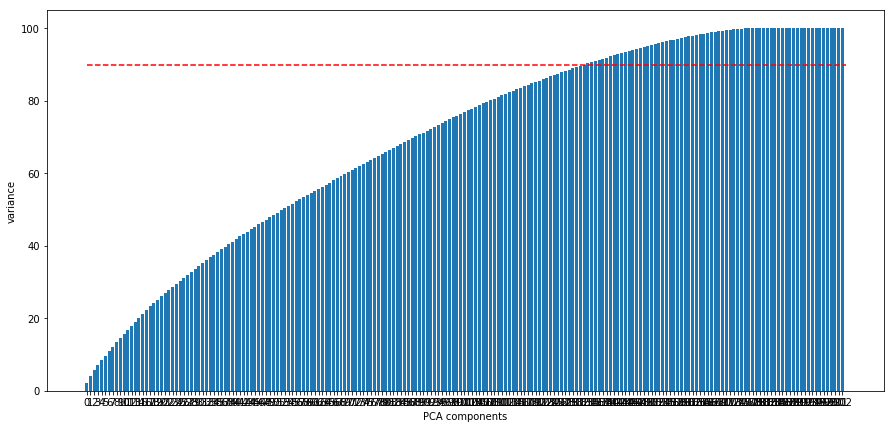

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
prediction = cross_val_predict(lr, x_train_scaled, y_train, cv=5, n_jobs=-1)
print('MAE',mean_absolute_error(y_train, prediction))
print('MSE',mean_squared_error(y_train, prediction))

pca = PCA()
pca.fit(x_train_scaled, y_train)
plotPCA(pca)

MAE 3.57969190873e+12
MSE 1.19697031373e+27


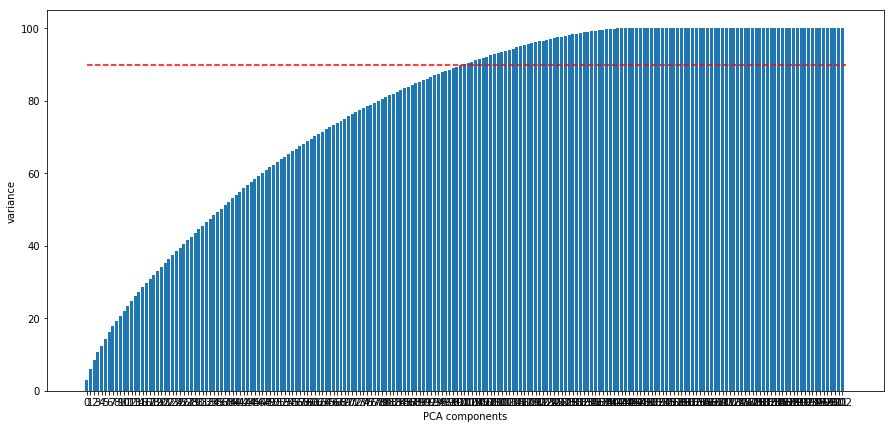

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train_f)
x_test_scaled = scaler.transform(x_test_f)
prediction = cross_val_predict(lr, x_train_scaled, y_train_f, cv=5, n_jobs=-1)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

pca = PCA()
pca.fit(x_train_scaled, y_train_f)
plotPCA(pca)

In [44]:
features = range(pca.n_components_)
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance[16*9+5], features[16*9+5])

100.01 149


In [45]:
pca = PCA(n_components=144)
pca.fit(x_train_scaled, y_train_f)
pca_features_train = pca.transform(x_train_scaled)
pca_features_test = pca.transform(x_test_scaled)
lr.fit(pca_features_train, y_train_f)
prediction = lr.predict(pca_features_test)
print('MAE',mean_absolute_error(y_test_f, prediction))
print('MSE',mean_squared_error(y_test_f, prediction))

MAE 0.496988985995
MSE 0.425323934092


**Заключение.** Уменьшение количества признаков сильно картину не улучшает, возможно это из-за масштабирования. (масштабирование коэффициентов не улучшает картину, либо я где-то ошибся, т.к. МАЕ и MSE были огромными)

### Построение модели LassoCV

In [46]:
from sklearn.linear_model import LassoCV

In [47]:
LS_CV = LassoCV(cv=5, n_jobs=-1)
LS_CV.fit(x_train_f,y_train_f)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [48]:
prediction = LS_CV.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.641807573893
MSE 0.686564012061


### Построение модели RidgeCV

In [49]:
from sklearn.linear_model import RidgeCV

In [50]:
Rg_CV = RidgeCV(cv=5)
Rg_CV.fit(x_train_f,y_train_f)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [51]:
prediction = Rg_CV.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.461739055015
MSE 0.403091803893


In [53]:
score_list = [0.01, 0.1, 1, 10, 100, 1000 ] #[ 'svd', 'eigen'] #['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error','neg_mean_squared_log_error','neg_median_absolute_error','r2']
# for score in score_list:
Rg_CV = RidgeCV(cv=5, alphas=score_list)
Rg_CV.fit(x_train_f,y_train_f)
prediction = Rg_CV.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction), 'MSE',mean_squared_error(y_train_f, prediction))


MAE 0.461739055015 MSE 0.403091803893


### Построение модели ElasticNet

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [55]:
alphas = [.01, .05, .1, .2, 1.0]
l1_ratios = np.linspace(.05, .15, 10)
# alphas = [0.1, 1.0, 10]
# l1_ratios = np.linspace(.1, .9, 3)
el_net = ElasticNet()
parameters = {'alpha':alphas, 'l1_ratio':l1_ratios}
grid = GridSearchCV(el_net, param_grid=parameters, scoring='mean_absolute_error' ,verbose=1, cv=5, return_train_score=1, n_jobs=-1)
grid.fit(x_train_f, y_train_f)
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   39.1s finished


-0.477068823166
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.083333333333333329, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [57]:
el_net_best = grid.best_estimator_
prediction = el_net_best.predict(x_train_f)
print(el_net_best.score(x_train_f, y_train_f))
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

0.450191945507
MAE 0.467798415912
MSE 0.411691341725


**Заключение.** Из рассмотренных моделей ElasticNet и RidgeCV показали хорошие результаты. Правда у ElasticNet коэффициент детерминации маловат и коэффициент `l1_ratio` такой что он по сути является RidgeCV (т.е. применятся Л2-регуляризация).  Обратимся к кривым валидации для проверки. 

In [58]:
from sklearn.ensemble import RandomForestRegressor
estimators = np.arange(5,60,20)
min_samples_leaf = np.arange(5,20,5)
parameters = {'n_estimators':estimators, 'min_samples_leaf':min_samples_leaf}
rfrr = RandomForestRegressor(criterion='mae', n_jobs=-1)
grid = GridSearchCV(rfrr, param_grid=parameters, scoring='mean_absolute_error', verbose=1, cv=5, return_train_score=1, n_jobs=-1)
grid.fit(x_train_f, y_train_f)
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.7min finished


-0.436771973083
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [59]:
rfrr_best = grid.best_estimator_
prediction = rfrr_best.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.300213181281
MSE 0.203827383664


**Заключение.** Лес дал неплохой результат.

In [60]:
from sklearn.ensemble import AdaBoostRegressor

estimators = np.arange(5,60,20)
loss = ['linear', 'square', 'exponential']
parameters = {'n_estimators':estimators, 'loss':loss}
abrr = AdaBoostRegressor(random_state=42)
grid = GridSearchCV(abrr, param_grid=parameters, scoring='mean_absolute_error', verbose=1, cv=5, return_train_score=1, n_jobs=-1)
grid.fit(x_train_f, y_train_f)
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   25.9s finished


-0.517091269246
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='square',
         n_estimators=45, random_state=42)


In [61]:
abrr_best = grid.best_estimator_
prediction = abrr_best.predict(x_train_f)
print('MAE',mean_absolute_error(y_train_f, prediction))
print('MSE',mean_squared_error(y_train_f, prediction))

MAE 0.506206826166
MSE 0.395577916191


###  Часть 8. Построение кривых валидации и обучения 

In [62]:
from sklearn.model_selection import learning_curve

In [63]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='mean_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

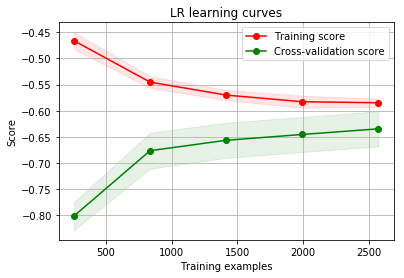

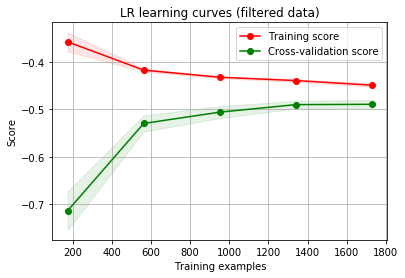

In [64]:
plot_learning_curve(lr, 'LR learning curves', x_train, y_train, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(lr, 'LR learning curves (filtered data)', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

**Заключение.** Судя по кривой обучения увеличение данных хорошо влияет, т.к. уменьшается вариация (varience).

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

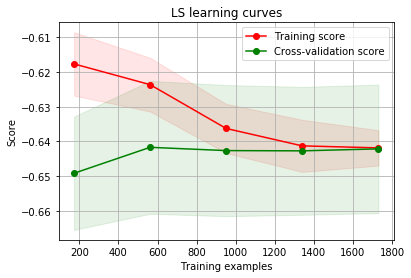

In [65]:
plot_learning_curve(LS_CV, 'LS learning curves', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

**Заключение.** Использовать эту модель не стоит, т.к. очень большое отклонение; а близкое расположение кривых при увеличении обучающей выборки говорит о высоком смещении оценки.

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

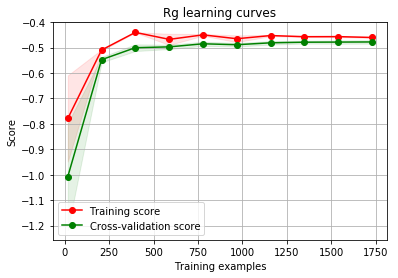

In [66]:
plot_learning_curve(Rg_CV, 'Rg learning curves', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.01, 1.0, 10))

**Заключение.** Тут выглядит очень непонятно. Вроде как не надо много данных и модель сразу же получает хорошую оценку. Масштабирование с 0,01 до 0,2 размера выборки ничего хорошего не показало. Поэтому думаю оставить эту модель ии посмотреть, что будет на тесте. 

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

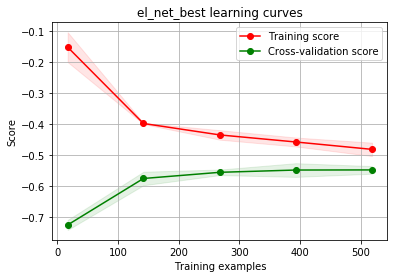

In [67]:
el_net_best = grid.best_estimator_
plot_learning_curve(el_net_best, 'el_net_best learning curves', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.01, .3, 5))

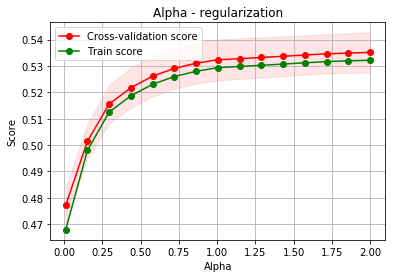

In [68]:
from sklearn.model_selection import cross_val_score
alphas = np.linspace(0.01, 2.0, 15) #[.01, .05, .1, .2, 1.0]
mse_array = []
mae_array = []
scores_array = []
scores_std_array = []

for alph in alphas:
    el_net_temp = ElasticNet(alpha=alph, l1_ratio=0.08333)
    el_net_temp.fit(x_train_f, y_train_f)
    
    scores = cross_val_score(el_net_temp, x_train_f, y_train_f, scoring='mean_absolute_error', cv=5, n_jobs=-1)
    prediction = el_net_temp.predict(x_train_f)
    
    scores_array.append(scores.mean())
    scores_std_array.append(scores.std())    
    mae_array.append(mean_absolute_error(y_train_f, prediction))
    mse_array.append(mean_squared_error(y_train_f, prediction))
#     print(alph, scores, 'MAE',mean_absolute_error(y_train_f, prediction), 'MSE',mean_squared_error(y_train_f, prediction))

plt.figure()
plt.title('Alpha - regularization')
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.grid()
plt.fill_between(alphas, -np.asarray(scores_array) - np.asarray(scores_std_array),
                 -np.asarray(scores_array) + np.asarray(scores_std_array), alpha=0.1,
                 color="r")
plt.plot(alphas, -np.asarray(scores_array), 'o-', color="r", label="Cross-validation score")
plt.plot(alphas, mae_array, 'o-', color="g", label="Train score")
plt.legend(loc="best")

**Заключение.** По валидационной кривой очень похоже на высокое смещение оценки. Как интерпретировать вторую кривую (скор от регуляризации) не знаю. Думал что тоже покажет мне или смещение или разброс, но не дало.

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

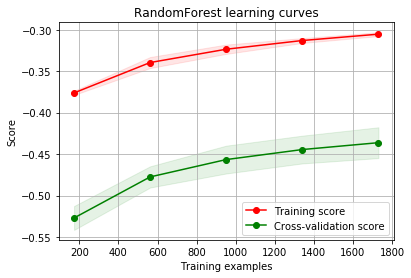

In [69]:
plot_learning_curve(rfrr_best, 'RandomForest learning curves', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\Ivan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

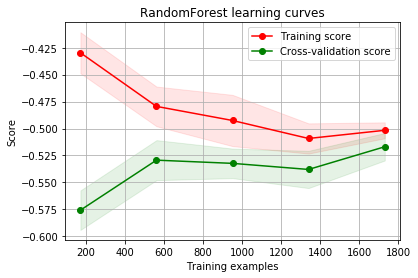

In [70]:
plot_learning_curve(abrr_best, 'RandomForest learning curves', x_train_f, y_train_f, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

**Заключение.** Более привычный рисунок для проверки. Чем больше данных тем лучше, highbias. 

###  Часть 9. Прогноз для тестовой или отложенной выборки

### LinearRegression

In [71]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.696071643821
MSE 1.14760097756


По отфильтрованной обучающей выборке:

In [72]:
lr.fit(x_train_f, y_train_f)
prediction = lr.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.676420754318
MSE 1.26507111217


### Остальные

In [73]:
LS_CV = LassoCV(cv=5, n_jobs=-1)
LS_CV.fit(x_train_f, y_train_f)
prediction = LS_CV.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.824191877944
MSE 1.59282299563


In [74]:
Rg_CV = RidgeCV(cv=5)
Rg_CV.fit(x_train_f, y_train_f)
prediction = Rg_CV.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.676495482607
MSE 1.26061237954


In [75]:
el_net_best = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.083333333333333329, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
el_net_best.fit(x_train_f, y_train_f)
prediction = Rg_CV.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.676495482607
MSE 1.26061237954


In [76]:
rfrr = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rfrr.fit(x_train_f, y_train_f)
prediction = rfrr.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.58582842312
MSE 1.00287863901


In [77]:
abrr = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=25, random_state=42)
abrr.fit(x_train_f, y_train_f)
prediction = abrr.predict(x_test)
print('MAE',mean_absolute_error(y_test, prediction))
print('MSE',mean_squared_error(y_test, prediction))

MAE 0.698062412734
MSE 1.09108771601


**Заключение**. Оценки как отфильтрованные, так и не отфильтрованные вполне соответствуют значениям метрик на обучающей выборке. Победил Случайный лес.

Я выбирал бы случайный лес или линейную регрессию. Первая как-то надёжнее, но вторая проще, разница в качестве между ними небольшая.

###  Часть 10. Оценка модели с описанием выбранной метрики

Так как не понятно было изначально к чему можно было прийти я пошёл классическим путём: выбрать что-то простое (линейная регрессия) и серебрянную пулю (Случайный лес). Собственно говоря они и хорошо зашли. Если честно, то не знаю что выбрать MSE или MAE. Я думаю что MAE говорит о точности оценки, а MSE что-то вроде разброса.

В целом я результатом доволен, не смотря на то, что я не использую данные об описании (можно было бы построить новые фичи, но как на это время на оставил), ключевые слова или кинокомпании. Даже без этого модели (Лес и ЛР) дают оценку с ошибкой в 100/10*0.58 = 5,8% и 6,7% соответственно. Пожалуй это и было бы основной метрикой, чем меньше процент ошибки, тем лучше - как инженерный подход.

### Часть 11. Выводы 

Теперь мы можем предсказывать рейтинг фильма. Это может нам понадобится при проведении подготовительных работ над фильмом - его  описание, закладывать бюджет и т.п. Почему результат такой - думаю, потому что основные признаки как популярность и количество голосов влияют больше остальных, да и фильтрация по бюджету и доходу - это было важно.